In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy as stat
from sklearn import preprocessing
import pylab
import scipy.stats as stats
from scipy.stats import kstest

import statsmodels.api as sm
from statsmodels.formula.api import ols

from scipy import stats
import math

In [2]:
path_atletas = r"athlete.csv"
df_atletas = pd.read_csv(path_atletas)

Los ejercicios planteados se realizaron respecto a la base de datos athlete, segun los requerimiento especificados en clase. En el presente notebook se desarrollaron las siguientes secciones:

9. Aplicar técnicas de:
    - Prueba de Normalidad
    - ANOVA
    - T-test        


Posterior a cada sección se adjunta la respectiva discusión/comentario de los principales procesos realizados y resultados obtenidos.

## 9.1. Prueba de normalidad

- Ho : "la distribucion de la variable no es distinta a la distribucion nomal"
- H1 : "la distribucion de la variable aleatoria es distinta a la distribucion nomal"

p-value. > 0.05 se acepta la hipotesis nula y se concluye que la variable tiene una distribucion normal

### 9.1.1 Graficamente

In [3]:
df_atletas_complete = df_atletas.dropna()
df_atletas_complete.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

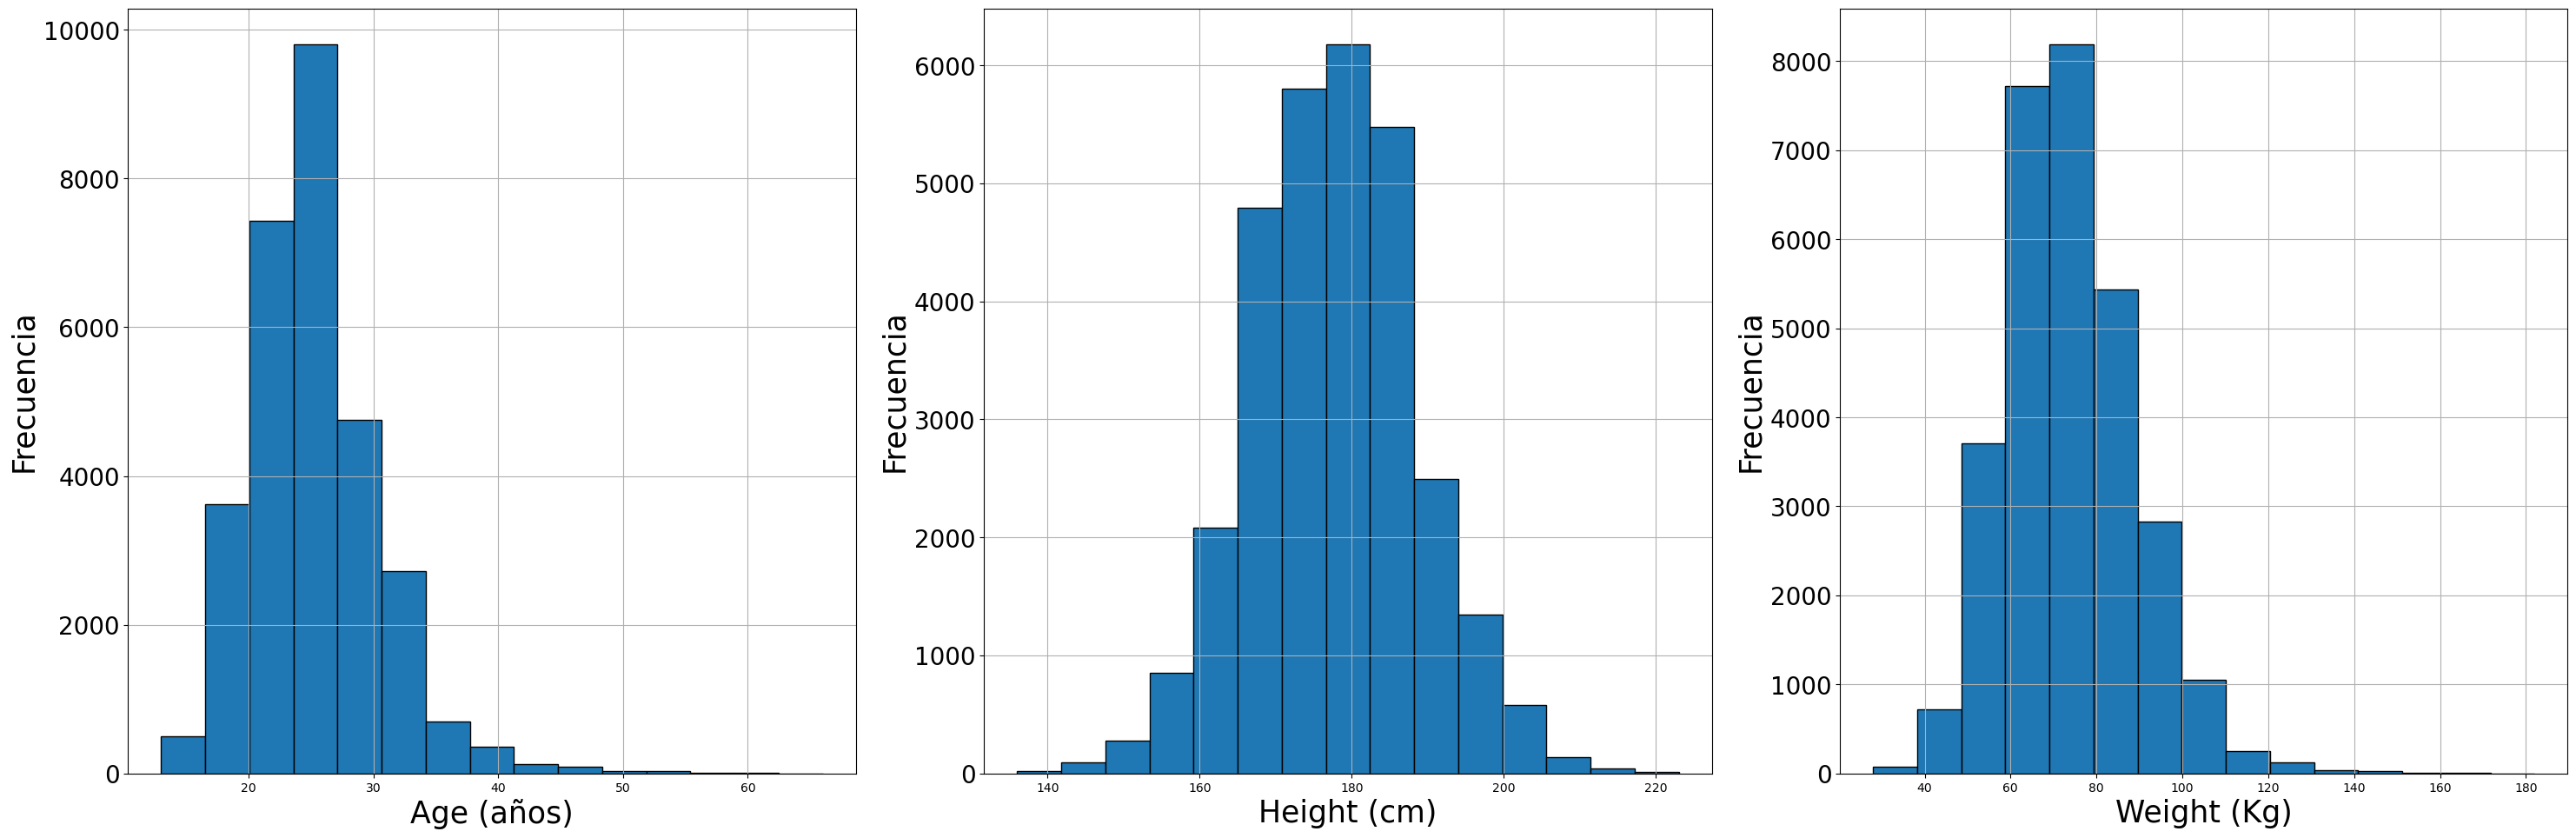

In [4]:
variables = ['Age', 'Height', 'Weight']
unidades  = ['años', 'cm', 'Kg']
fig1, axs = plt.subplots(1,len(variables), figsize=(30,10))

for i in range(len(variables)):
    axs[i].hist(df_atletas_complete[f'{variables[i]}'], bins=15, edgecolor="black",linewidth=1)
    axs[i].set_xlabel(f'{variables[i]} ({unidades[i]})', fontsize=25)
    axs[i].tick_params(axis='y', labelsize=20)
    axs[i].set_ylabel('Frecuencia', fontsize=25)
    axs[i].grid()

fig1.tight_layout(pad=2.0)
plt.show()

Q-Q plots


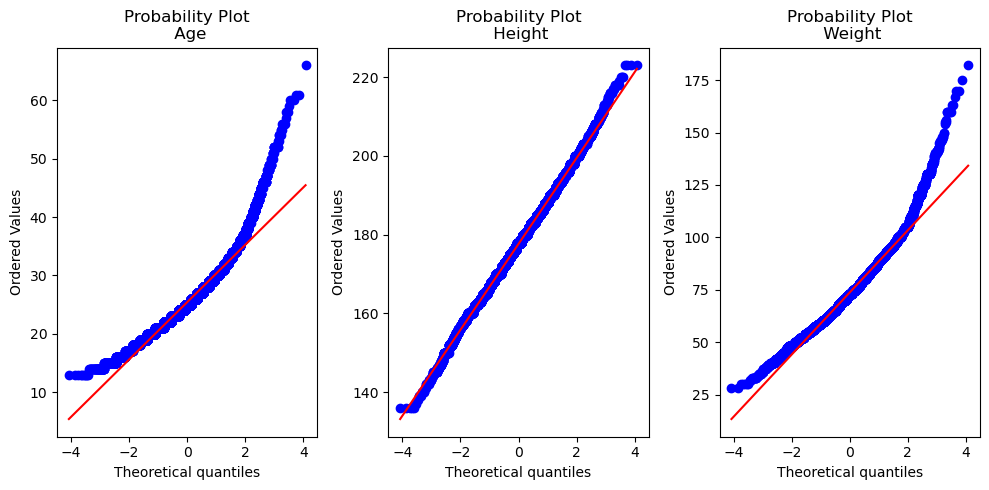

In [5]:
print('Q-Q plots')
plt.figure(figsize=(10, 5))
ax1 = plt.subplot(131)
res = stats.probplot(df_atletas_complete[f'{variables[0]}'],dist="norm",plot=plt)
ax1.set_title(f'Probability Plot\n {variables[0]}')
ax2 = plt.subplot(132)
res = stats.probplot(df_atletas_complete[f'{variables[1]}'],dist="norm",plot=plt)
ax2.set_title(f'Probability Plot\n {variables[1]}')
ax3 = plt.subplot(133)
res = stats.probplot(df_atletas_complete[f'{variables[2]}'],dist="norm",plot=plt)
ax3.set_title(f'Probability Plot\n {variables[2]}')


plt.tight_layout()

### 9.1.2 Analíticamente

------------------------------------------
Variable : Age
estadistico=0.084, p_value=0.00169
------------------------------------------
Variable : Height
estadistico=0.050, p_value=0.16338
------------------------------------------
Variable : Weight
estadistico=0.072, p_value=0.01033


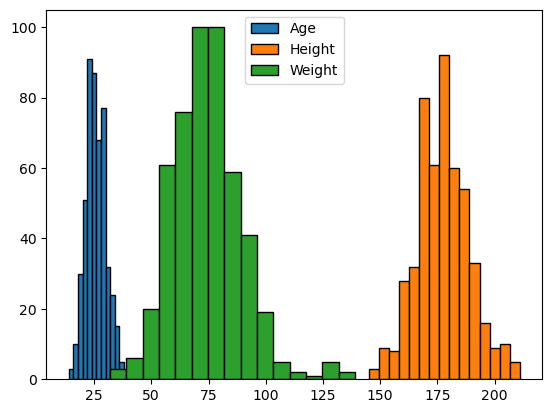

In [6]:
np.random.seed(0)
tamano_muestra = 500
for i in range(len(variables)):
    data = np.random.choice(df_atletas_complete[f'{variables[i]}'],
                                       tamano_muestra)
    
    loc, scale = stats.norm.fit(data)
    n = stats.norm(loc=loc, scale=scale)
    estadistico,p_value = kstest(data, n.cdf)
    plt.hist(data, label=f'{variables[i]}', bins=15, edgecolor="black",linewidth=1)
    plt.legend()
    
    print('------------------------------------------')
    print(f'Variable : {variables[i]}')    
    print('estadistico=%.3f, p_value=%.5f' %(estadistico,p_value))

### 9.2 ANOVA

In [7]:
model = ols('Height ~ NOC',                 # Model formula
            data = df_atletas_complete).fit()
                
anova_result = sm.stats.anova_lm(model, typ=2)
print (anova_result)

                sum_sq       df          F  PR(>F)
NOC       3.954570e+05    142.0  26.091355     0.0
Residual  3.206161e+06  30038.0        NaN     NaN


In [8]:
np.random.seed(0)
tamano_muestra = 1000
chosen_idx = np.random.choice(len(df_atletas_complete), replace=False, size=tamano_muestra)
df_atletas_complete_trimmed = df_atletas_complete.iloc[chosen_idx]

model = ols('Height ~ C(Sport) + C(Medal) + C(Sport):C(Medal)', data=df_atletas_complete_trimmed).fit()
df_anova_typeI = sm.stats.anova_lm(model, typ=1)
df_anova_typeI.round(5)

,df,sum_sq,mean_sq,F,PR(>F)
C(Sport),49.0,36951.39793,754.11016,8.40796,0.00000
C(Medal),2.0,68.88295,34.44148,0.38401,0.68124
C(Sport):C(Medal),98.0,7091.81752,72.36548,0.80684,0.91035
Residual,868.0,77850.96087,89.69005,NaN,NaN


In [9]:
df_anova_typeII = sm.stats.anova_lm(model, typ=2)
df_anova_typeII.round(5)

C:\Users\Carolina\anaconda3\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 49, but rank is 34
  warnings.warn('covariance of constraints does not have full '
C:\Users\Carolina\anaconda3\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 98, but rank is 82
  warnings.warn('covariance of constraints does not have full '


,sum_sq,df,F,PR(>F)
C(Sport),49026.66281,49.0,11.15558,0.00000
C(Medal),55.35684,2.0,0.30860,0.73455
C(Sport):C(Medal),7351.78316,98.0,0.83642,0.84629
Residual,77850.96087,868.0,NaN,NaN


In [10]:
df_anova_typeIII = sm.stats.anova_lm(model, typ=3)
df_anova_typeIII.round(5)

C:\Users\Carolina\anaconda3\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 98, but rank is 82
  warnings.warn('covariance of constraints does not have full '


,sum_sq,df,F,PR(>F)
Intercept,85008.33333,1.0,947.80119,0.00000
C(Sport),16371.40693,49.0,3.72517,0.00000
C(Medal),26.66667,2.0,0.14866,0.86188
C(Sport):C(Medal),7351.78316,98.0,0.83642,0.84629
Residual,77850.96087,868.0,NaN,NaN


In [11]:
model = ols('Height ~ C(Sport) + C(NOC) + C(Sport):C(NOC)', data=df_atletas_complete_trimmed).fit()
df_anova_typeI = sm.stats.anova_lm(model, typ=3)
df_anova_typeI.round(5)

C:\Users\Carolina\anaconda3\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3773, but rank is 434
  warnings.warn('covariance of constraints does not have full '


,sum_sq,df,F,PR(>F)
Intercept,3.558518e+05,1.0,4578.27321,0.00000
C(Sport),2.629856e+04,49.0,6.90508,0.00000
C(NOC),1.095176e+04,77.0,1.82989,0.00006
C(Sport):C(NOC),1.185674e+06,3773.0,4.04307,0.00000
Residual,4.360440e+04,561.0,NaN,NaN


## 9.3 T-test

In [12]:
np.random.seed(100)
tamano_muestra = 30
chosen_idx = np.random.choice(len(df_atletas_complete), replace=False, size=tamano_muestra)
df_atletas_complete_trimmed_ttest = df_atletas_complete.iloc[chosen_idx]


df_masculino=df_atletas_complete_trimmed_ttest.Height[df_atletas_complete_trimmed_ttest.Sex=='M']
df_femenino=df_atletas_complete_trimmed_ttest.Height[df_atletas_complete_trimmed_ttest.Sex=='F']

Text(0.5, 1.0, 'Peso vs Genero')

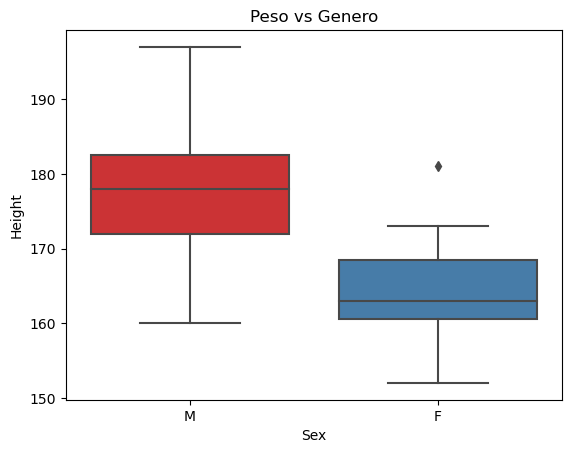

In [13]:
sns.boxplot(x="Sex",y="Height",data=df_atletas_complete_trimmed_ttest,palette="Set1")
plt.title("Peso vs Genero")

In [14]:
n_masculino=len(df_masculino)
n_femenino=len(df_femenino)
avg_masculino=df_masculino.mean()
avg_femenino=df_femenino.mean()
std_masculino=df_masculino.std()
std_femenino=df_femenino.std()

print("Estadística descriptiva")
print("------------------------------------")
print("Hombres")
print("n_masculino:%.0f" %(n_masculino))
print("avg_masculino:%.1f"%avg_masculino)
print("std_masculino:%.1f"%std_masculino)
print("------------------------------------")
print("Mujeres")
print("n_femenino:%.0f"%n_femenino)
print("avg_femenino:%.1f"%avg_femenino)
print("std_femenino:%.1f"%std_femenino)
print("------------------------------------")
confiance=0.95
print("Intervalo de confianza al ", confiance*100, '%\n')


h_masculino= std_masculino/math.sqrt(n_masculino)*stats.t.ppf((1+confiance)/2,n_masculino-1)
h_femenino = std_femenino/math.sqrt(n_femenino)*stats.t.ppf((1+confiance)/2,n_femenino-1)
print("CI Height HOMBRES: %.1f - %.1f (cm)"%(avg_masculino-h_masculino,avg_masculino+h_masculino))
print("CI Height MUJERES: %.1f - %.1f (cm)"%(avg_femenino-h_femenino,avg_femenino+h_femenino))
      
    

Estadística descriptiva
------------------------------------
Hombres
n_masculino:23
avg_masculino:178.3
std_masculino:9.7
------------------------------------
Mujeres
n_femenino:7
avg_femenino:164.9
std_femenino:9.5
------------------------------------
Intervalo de confianza al  95.0 %

CI Height HOMBRES: 174.1 - 182.5 (cm)
CI Height MUJERES: 156.1 - 173.6 (cm)


In [15]:
print("Prueba T")
tprueba,pvalue=stats.ttest_ind(df_masculino,df_femenino,equal_var=False)
print("t prueba:%.5f"%tprueba)
print("pvalue:%.5f"%pvalue)

Prueba T
t prueba:3.26888
pvalue:0.00828


## D9. Discusión de resultados

#### 9.1 Prueba de normalidad
- 9.1.1 Gráficamente analizando los Q-Q plots de las tres variables analizadas, "Height", "Weight" y "Age", se puede observar que la variable que tiene una distribución normal es "Height", ya que la mayoría de los datos están alineados sobre la diagonal, en contraste a los Q-Q de Weight y Age, que tienen desviaciones en los extremos. 
- 9.1.2 Análiticamente, bajo la prueba de Kolmogorov-Smirnov, primero se evidenció la sensibilidad en su aplicación respecto al tamaño de muestra, al utilizar un n=50 la hipótesis nula se aceptaba para las tres variables pero al realizar la validación con n=500, sólo fué validada para la variable Height.

#### 9.2 ANOVA

9.2.1 Considerando los tres tipos de suma de cuadrado en ANOVA, las tendecias para los p valores son los siguientes: 
  
  Tal que : *'Height ~ C(Sport) + C(Medal) + C(Sport):C(Medal)'*

- **sport**: p-value = [0, 0, 0] < 0.05 
- **medal**: p-value = [0.681, 0.734, .8618 ] > 0.05
- **sport*medal**: p-value = [0.91035, 0.846, 0.846] > 0.05

Dado que los valores de p para **sport** son inferiores a 0,05, esto significa que tienen un efecto estadísticamente significativo en la altura del atleta. Por el contrario, **medal** con p-value mayor a 0.05, no tiene un efecto significativo en la altura.

Y dado que el valor p para el efecto de interacción **sport*medal** no es inferior a 0,05, esto nos dice que no existe un efecto de interacción significativo entre la variable sport y medal.


9.2.2 Por otro lado, *Height ~ C(Sport) + C(NOC) + C(Sport):C(NOC)*  

Considerando **sport** y **NOC**, se evidenció que ambas variables rechazan la hipotesis nula, esto significa que tienen un efecto estadísticamente significativo en la altura del atleta. Por último, dado que el valor p para el efecto de interacción **sport** * **NOC** es inferior a 0,05, esto nos dice que existe un efecto de interacción significativo entre la variable sport y NOC. 

#### 9.3 T-test

Utilizando una muestra de n=30 observaciones, altura del atleta por sexo, bajo la prueba t con un pvalue:0.00828, se rechaza la hipotesis nula, es decir existe diferencia entre ambas medias de los atletas por sexo.
